<a href="https://colab.research.google.com/github/jdcarrascali/Matematicas-del-aprendizaje-de-m-quina/blob/main/Ejercicios_cap%C3%ADtulo1_Learning_from_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Juan David Carrascal Ibañez**

**Matemáticas-Universidad Nacional de Colombia.**

**Ejercicios entregables: Mátematicas del aprendizaje de máquina**

#Problema 1 (Ejercicio 1.2 del ligro guía):

Suponga que usamos el perceptrón para detectar spam. Supongamos que cada correo electrónico es representado por la frecuencia de aparición de palabras clave y la salida es $+1$ si el mensaje es considerado spam.

i). ¿Podría dar ejemplos de palabras claves que terminen con un peso positivo grande en el perceptrón?

ii). ¿Qué pasa con las palabras clave que tienen peso negativo?

iii). ¿Cuál parámetro del perceptrón afecta directamente cuántos mensajes límite terminarán siendo clasificados como spam?

**Solución:** 

i). Ganaste, participa, compra, inscribete, vacaciones, etc

ii). Pueden ser palabras referidas a correos que  requieren mayor prioridad; por ejemplo, para un estudiante, este tipo de palabra podrían ser: tareas, examen, calificación, entre otras. O para un ofinista podrían ser: reunión, informe, archivos, presentación, entre otros.

iii). Según el modelo del perceptrón, este parámetro claramente sería el umbral representado por el hiperplano que define el algotitmo.

#Problema 2 (Ejercicio 1.3 del libro guía):

La regla de peso actualizada $w(t+1)=w(t)+y(t)x(t)$ tiene una buena interpretación de que este se mueve correctamente en la dirección de clasificación de $x(t)$.

i). Muestre que $y(t)w^T(t)x(t)<0$.

ii). Muestre que $y(t)w^T(t+1)x(t)>y(t)w^T(t)x(t)$.

iii). Respecto a la clasificación de $x(t)$, argumente que el movimiento desde $w(t)$ hasta $w(t+1)$ es un movimiento en la dirección correcta.

**Solución:** 

i) Dado que $y(t)\neq sgn(w^{T}(t)x(t))$ tenemos las siguientes dos posibilidades:    

* **Caso 1:** $\ y>0\ $  y  $ \ w^{T}(t)x(t)<0$
* **Caso 2:** $ \ w^{T}(t)x(t)>0\ $ y $ \ w^{T}(t)x(t)<0$

En cualquier caso se concluye que $y(t)w^{T}(t)x(t)<0$.

ii) Observe que 
\begin{equation*}
\begin{split}
y(t)w^{T}(t+1)x(t)&=y(t)(w(t))+y(t)x(t))^Tx(t)\\
                  &=y(t)(w^{T}(t))+y^{T}(t)x^{T}(t))x(t)\\
                  &=y(t)w^{T}(t)x(t)+y(y)y^{T}(t)x^{T}(t)x(t)\\
                  &=y(t)w^{T}(t)x(t)+\|x\|^{2}\|y\|^{2}
\end{split}
\end{equation*}
Como $y=\pm 1$ entonces $\|y\|^{2}=1$. Lo que implica por la igualdad anterior que:
\begin{equation*}
\begin{split}
  y(t)&w^{T}(t+1)x(t)=y(t)w^{T}(t)x(t)+\|x\|^{2}>y(t)w^{T}(t)x(t)\\
                     & \therefore \ \   y(t)w^{T}(t+1)x(t)>y(t)w^{T}(t)x(t)
\end{split}
\end{equation*}


iii) Sea $\nu(t)=w(t)V^{T}x(t)$; esto es, el movimiento de $w(t)$ hasta $w(t+1)$. Luego, por ii):

\begin{equation*}
y(t)\nu(t)x(t)=y(t)(w^{T}(t+1)-w^{T}(t))x(t)>0
\end{equation*}
Esto implica que $y(t)=sign(\nu(t)x(t))$, de manera que la clasificación de $x(t)$ es la correcta.




#Problema 3 (Ejercicio 1.10 del libro guía):
Aquí un ejemplo que ilustra la diferencia entre un recipiente y recipientes multiples. Haga un programa que simule el lanzar $1000$ monedas "fair". Lance cada moneda independientemente diez veces. Enfoquemonos en tres monedas como sigue:
$c_1$ es la primera moneda que lanzamos, $c_{\text{rand}}$ es una moneda que escogemos aleatoriamente y $c_{\text{min}}$ es la moneda que tiene la mínima frecuencia de caras (escoja la que se haya lanzado de primeras en caso de que hayan repetidas). Sean $v_1$, $v_{\text{rand}}$ y $v_{\text{min}}$ las fracciones de caras que obtuvimos para cada una de las respectivas tres monedas.

i). ¿Cuál es el valor de $\mu$ para las tres monedas seleccionadas?

ii). Repita el experimento un número grande de veces (e.g., $100000$ ejecuciones de todo el experimento) para conseguir varias instacias de $v_1$, $v_{\text{rand}}$ y $v_{\text{min}}$ y dibuje los histogramas de las distribuciones de $v_1$, $v_{\text{rand}}$ y $v_{\text{min}}$. Observe que las monedas que terminan siendo $c_1$, $c_{\text{rand}}$ y $c_{\text{min}}$ pueden diferir de una ejecución a otra.

iii). Usando ii). graficar estimaciones para $P[|v-\mu|>\epsilon]$ como una función de $\epsilon$, junto con la cota de Hoeffding $2e^{-2\epsilon^2N}$ (en la misma gráfica).

iv). ¿Cuáles monedas cumplen la cota de Hoeffding y cuáles no? Explique por qué.

v). Relacione la parte iv. con los recipientes de la siquiente figura:

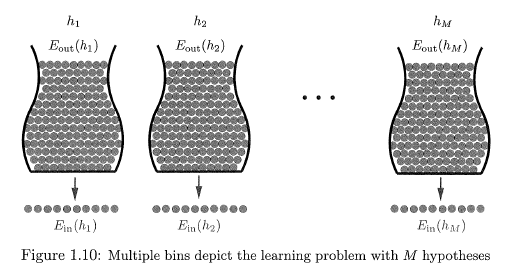


**Solución:**

i). Como las monedas son "fair" al lanzar cualquier moneda, la probabilidad de obtener cara es igual a la de tener sellos pues estamos haciendo el experimento solo una vez, por tanto $\mu=0.5$ tanto para $c_1$, $c_{\text{rand}}$ y $c_{\text{min}}$, simultaneamente.

ii) Se implementó el siguiente script, haciendo uso de que una variable aleatoria con distribución binomial modela este problema.

In [2]:
import numpy as np
''' Hacemos 100000 veces el experimento de lanzar 1000 monedas y cada una de ellas
    se lanza 10 veces independientemente, donde la probabilidad de obtener una
    cara es mu=0.5.
'''
v=np.random.binomial(10,0.5,(100000,1000))
''' Ahora calculemos v1, vmin, vrand teniendo en cuenta que estas cuentan la 
    frecuencia de caras sobre el numero de veces que es lanzada cada moneda (10).'''
v1=v[:,0]/10
vmin=v.min(axis=1)/10
vrand=np.apply_along_axis(np.random.choice,1,v)/10
'''Voy a verificar que si esté tomando las listas correctamente. '''
print(' longitud v1: ',len(v1),'\t v1=',v1,'\n',
      'longitud vmin: ',len(vmin),'\t vmin=',vmin,'\n',
      'longitud vrand: ',len(vrand),'\t vrand=',vrand)

 longitud v1:  100000 	 v1= [0.4 0.5 0.6 ... 0.6 0.7 0.7] 
 longitud vmin:  100000 	 vmin= [0.  0.  0.1 ... 0.1 0.  0.1] 
 longitud vrand:  100000 	 vrand= [0.5 0.4 0.7 ... 0.5 0.5 0.4]


In [3]:
'''En efecto realizamos 100000 experimentos y tomamos las fracciones deseadas.
   Veamos ahora los histogramas. '''
import pandas as pd
li=np.array([v1,vmin,vrand])
my_pd=pd.DataFrame(data=[v1,vmin,vrand]).T
my_pd.columns=["v1","vmin","vrand"]

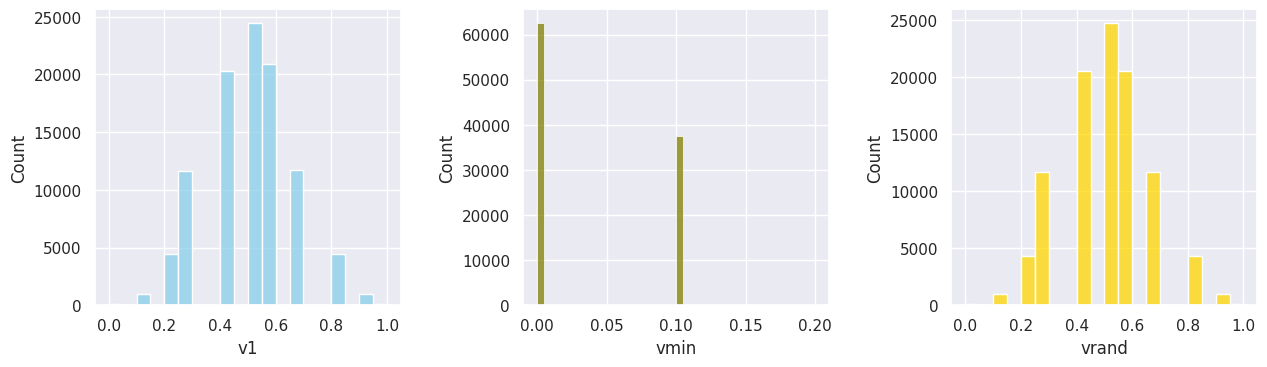

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib import style
style.use('ggplot') 

sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 3, figsize=(15, 4))
fig.subplots_adjust(top=0.85,hspace=0.25,wspace=0.4)

sns.histplot(data=my_pd["v1"], color="skyblue",ax=axs[0],binwidth=0.05)
sns.histplot(data=my_pd["vmin"], color="olive", ax=axs[1],binwidth=0.005)
sns.histplot(data=my_pd["vrand"], color="gold", ax=axs[2],binwidth=0.05)

plt.show()

Notamos que $v_1$ y $v_{\text{rand}}$ tienen un comportamiento similar, lo cual es claro porque en $v_1$ estamos tomando la primera entrada en cada experimento, pero esta entrada no se escoge de una manera en específico; además, $v_1$ y $v_{\text{rand}}$ están distribuidas al rededor de $0.5=\mu$ mientras que  $v_{\text{min}}$ no.

iii)

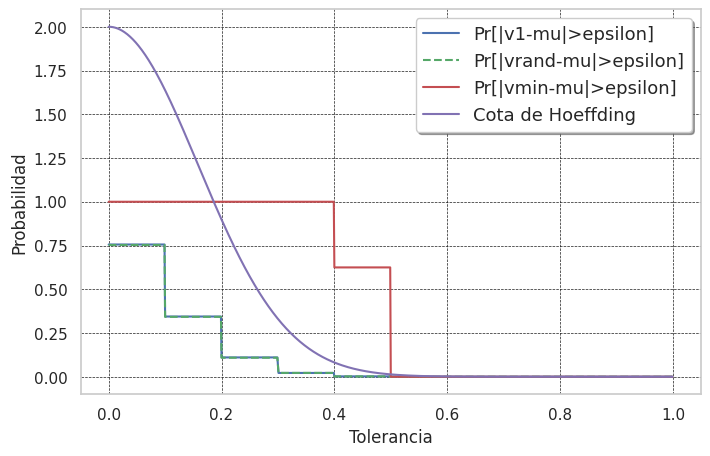

In [11]:
sns.set_style("whitegrid")
mu=0.5
plt.rcParams['font.size'] = 9
#Funcion que calcula los valores de la cota de Hoeffding
def cotaHoeff(epsilon):
  return 2 * np.exp(-2 *10*(epsilon**2))
a,b=0,1
epsilon = np.arange(a, b, (b-a)/1000)
#Creando listas para almacenar las probabilidades
y1=[]
for i in range(0,1000):
  y1.append(np.mean(np.abs(v1-mu)>epsilon[i]))
yrand=[]
for i in range(0,1000):
  yrand.append(np.mean(np.abs(vrand-mu)>epsilon[i]))
ycota= cotaHoeff(epsilon)
ymin=[]
for i in range(0,1000):
  ymin.append(np.mean(np.abs(vmin-mu)>epsilon[i]))
ycota= cotaHoeff(epsilon)
#Graficando los resultados
plt.figure(figsize=(8, 5))
plt.plot(epsilon, y1, 'b-',label='Pr[|v1-mu|>epsilon]')
plt.plot(epsilon, yrand, 'g--',label='Pr[|vrand-mu|>epsilon]')
plt.plot(epsilon, ymin, 'r-',label='Pr[|vmin-mu|>epsilon]')
plt.plot(epsilon, ycota, 'm-',label='Cota de Hoeffding')
plt.ylabel("Probabilidad")
plt.xlabel("Tolerancia") #Valor de epsilon
plt.grid(color='k', linestyle='--', linewidth=.5)
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.show()

iv).
Note que la curva de probabilidades para $c_1$ se sobrelapa con la de $c_{rand}$, y que a su vez estas satisfacen la cota de Hoeffding. Sin embargo, observamos que la curva de probabilidades para $c_{min}$ no satisface la cota. Una posible explicación para este fenómeno es que $c_{min}$ se obtuvo a partir de observar todas las realizaciones del experimento y generar una constante a partir de ellas, el efecto de esto es que se estaría violando el principio de independencia de las variables aleatorias incluidas en la desigualdad. 

v) En el caso de las monedas que satisfacen la cota de Hoeffding, los contenedores representan todos los posibles espacios de hipótesis a partir de los cuales podemos suponer que vienen nuestras muestras. En el caso de la moneda que no satisface la desigualdad, se tiene que los contenedores que tenemos (espacios de hipótesis) no representan completamente a los contenedores de donde provienen nuestras muestras, esto sucede pues el experimento realizado descarta hipótesis después de varias realizaciones.

#Problema 4 (Ejercicio 1.11 del libro guía):

Se da un  conjunto de datos $D$ con $25$ ejemplos de entrenamiento de una función desconocida $f: X\rightarrow Y$ con $X=\mathbb{R}$ y $Y=\{-1,1\}$. Para aprender $f$, usamos un conjunto de hipótesis simple $H=\{h_1,h_2\}$ donde $h_1$ es la función constante $1$ y $h_2$ es la función constante $-1$.

Ahora consiferamos dos algoritmos de aprendizaje, el inteligente $S$ y el loco $C$. $S$ elige la hipótesis que más concuerda con $D$ y $C$ elige la otra hipótesis deliberadamente. Veamos cómo funcionan estos algoritmos a partir de muestras desde los puntos de vista determinista y probabilístico. Asuma desde el punto de vista probabilistico que existe una distribución de probabilidad sobre $X$ y sea $P[f(x)=1]=p$.

i). ¿$S$ puede producir una hipótesis que está garantizada para funcionar mejor aleatoriamente en cualquier punto fuera de $D$?

ii). Asumamos para el resto del ejercicio que todos los ejemplos en $D$ tienen $y_n=1$ ¿es posible que las hipótesis que produce $C$ sean mejores que las que produce $S$?

iii). Si $p=0.9$ ¿cuál es la probabilidad de que $S$ produzca una mejor hipótesis que $C$?

iv). ¿Hay algún valor para $p$ para el cual $C$ no produzca una mejor hipótesis que S?



**Solución:**

**i)** Que $S$ elija la hipótesis que más concuerda con $D$ no nos garantiza que el desempeño de esta hipótesis se comporte mejor que una selección aleatoria de etiquetas. Considere la situación en la que al seleccionar el conjunto de datos $D$ de un conjunto de 100 elementos, obtenemos precisamente 25 ejemplos etiquetados con $+1$ y que el resto de elementos fuera de $D$ son etiquetados con $-1$. $S$ eligirá la hipótesis $h_1$, sin embargo, si se seleccionan de manera aleatoria las etiquetas para los demás elementos fuera de D,  está clasificación puede obtener a lo sumo, una precisión del 75$\%$, mientras que la hipótesis $h_1$ solo tendrá un $25\%$.

**ii)** En efecto, es la situación descrita en $a)$. Bajo las mismas hipótesis, agregamos que $C$ juega el papel del clasificador aleatorio y que puede producir una mejor hipótesis que $S$ pero esto no se tiene garantizado en todos los escenarios. Esto ocurre cuando la hipótesis que produzca $C$ tenga una precisión mayor al $25\%$.

**iii)** La pregunta planteada es equivalente a determinar cuando la probabilidad del error fuera de la muestra por el algoritmo $S$ sea menor que el error fuera de la muestra generado por el algoritmo $C$. Esto es, ver cuando la probabilidad de que $f\neq h_1$ sea menos que $f \neq h_2$. Como $h_1=1$, $h_2=-1$ y $p=P[f(x)=1]$ entonces 
\begin{equation*}
\begin{split}
P[f\neq h_1]&=1-p\\
P[f\neq h_2]&=p
\end{split}
\end{equation*}
De manera que el problema de determinar cuál es la probabilidad de que $S$ produzca una mejor hipótesis que $C$, se reduce a calcular (abusando un poco de la notación)
\begin{equation*}
P[\{f\neq h_1\}<\{f\neq h_2\}]=P[1-p<p]=P[0.1<0.9]=1
\end{equation*}

Luego, la probabilidad buscada es 1. Es decir,  $S$ va a producir con seguridad una mejor hipótesis que $C$.

**iv)** Primero, note que la probabilidad de que $C$ produzca mejores hipótesis que $S$ es la probabilidad de que el error de $h_2$ fuera de $D$ sea menor que el error de $h_1$ fuera de $D$.Luego, la probabilidad del evento opuesto, es decir, de que $C$ no produzca mejores hipótesis que $S$ es la probabilidad de que el error fuera de la muestra de $h_1$ sea menor que el error fuera de la muestra de $h_2$. Esto se puede calcular, análogamente a como hicimos en el punto anterior mediante
\begin{equation*}
P[1-p\leq p]=P[1\leq 2p ]=P[0.5\leq p]
\end{equation*}
Y esto ocurre solamente sí $p\geq 0.5$.

#Problema 5 (Ejercicio 1.12 del libro guía).

Una amiga te pregunta sobre un problema de aprendizaje. Ella dice que la función objetivo $f$ es totalmente desconocida, pero ella tiene 4000 ejemplos. Ella está dispuesta a pagarte para resolver su problema y producir para ella una función $g$ que aproxime a $f$. ¿Qué es lo mejor que puedes prometerle entre lo siguiente?

**(a)** Después de aprender tu le proporcionarás $g$ tal que garantizas que $g$ aproxima bien a $f$ fuera de los ejemplos.

**(b)** Después de aprender tu le proporcionarás $g$ tal que con muy alta probabilidad esta $g$ aproxima bien a $f$ fuera de los ejemplos.

**(c)** Se tienen alguno de los siguientes dos casos:

*(i)* Tu producirás una hipótesis $g$,

*(ii)* Tu dirás que no pudiste hallar tal $g$.

Y si tú produces una hipótesis $g$ entonces con alta probabilidad esta $g$ aproxima bien a $f$ fuera de los ejemplos.

**Solución.** Ya hemos visto que la función objetivo $f$ puede ser muy compleja, tanto que sea dificil ajustar los datos a una cierta hipótesis $g$; por tanto, de las opciones dadas la que tiene más sentido es la **(c)**, pues en esta aceptamos que $f$ puede ser demasiendo compleja. Además, de acuerdo a la desigualdad de Hoeffding:
$$\mathbb{P}[|\nu-\mu|>\epsilon]\leq 2e^{-2\epsilon^2N}\text{, donde $\nu$ es el error en la muestra y $\mu$ el error en la población;}$$
al ser $N=4000$ que es relativamente grande, se tiene que si producimos tal hipótesis $g$, los errores cometidos al aproximar con la función objetivo $f$ no serán grandes. En el sentido PAC, con alta probabilidad $g$ aproxima bien a $f$ fuera de los ejemplos.